## Basic Segmentation Techniques

### Image thresholding
##### Image thresholding is a segmentation technique used to divide an image into various categories based on the intensity values of the pixels. Image thresholding helps us to binarize an image. A binary image has values that are either 0  or 255, unlike grayscale image, where the pixel values can range from 0 to 255. Thresholding is performed by comparing the individual pixel intensity values to a predefined threshold value. If a pixel value is lower than the threshold, it is assigned to another category.
##### Thresholding has several important uses in image processing. The Most important use case of thresholding is image segmentation. By choosing appropriate methods and values, thresholding can be used to seperate foreground objects from the background. Thresholding is used for more advanced image processing algorithms. Thresholding can help us apply various operations, such as noise reduction or edge detection, to achieve better results.
##### Thresholding can be accomplished using a variety of techniques. The most fundamental form of thresholding is binary thresholding, where a global thresholding is binary thresholding, where a global threshold value is set, and all the image pixels are modified based on this value.

### Simple Thresholding
##### Simple or Binary thresholding is a very simple thresholding to divide the image in two parts. Binary thresholding works by comparing the pixel intesity values, by a predefined value and categorizing each pixel of the image accordingly. Pixel having intensity values greater than or equal to the threshold value are set to 255, while the pixels having lower values are set to 0. The threshold value is selected based on the requirements of the task at hand.

##### Simple thresholding can be performed using various techniques.
### Binary Thresholding
##### This is the simple binary segmentation where image pixels are segmented into two categories based on the threshold values. Pixel intensity values above this value are set to the maximum value, the values below are set to 0

### Inverse Binary Thresholding
##### This is exactly the opposite of binary thresholding. It is flipped result of binary thresholding. Pixel intensities above the threshold value are set to 0 while pixel intensities below or equal are set to the maximum value.

### Truncated Thresholding:
##### In this method, all the pixel intensities above the threshold value are set to the threshold value instead of the maximum value. The pixel intensities remain unchanged if they are below or equal to the threshold value.

### Threshold to Zero:
##### This method converts the pixel intensities below the threshold value to zero. Pixel intensities above the threshold value remain unchanged.

### Inverse Threshold to Zero:
##### Opposite of the Threshold to zero parameter. Pixel intensity value above the threshold value are set to 0. Values below or equal to the threshold value remain unchanged.


In [1]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('Images/Input Images/Chapter 6/img.jpg', cv2.IMREAD_GRAYSCALE)

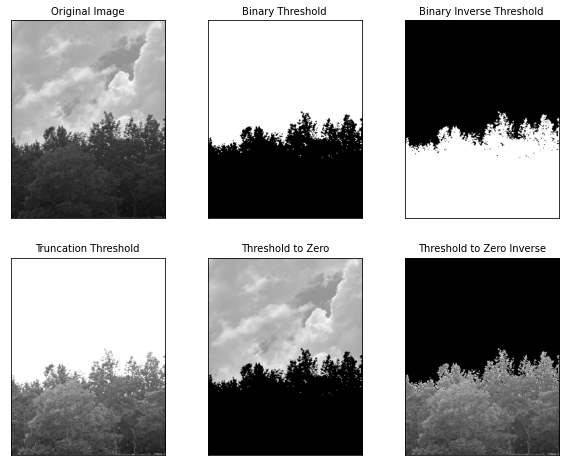

In [2]:
#Apply binary threshold
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Apply binary inverse threshold
_, binary_inv = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV )

# Apply to truncation threshold
_, trunc = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC )

# Apply to zero threshold
_, to_zero = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO )

# Apply to zero inverse threshold 
_, to_zero_inv = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)

#set figure size
plt.figure(figsize=(10, 8))

plt.subplot(231), plt.imshow(image, cmap='gray')
plt.title('Original Image', fontsize=10 ), plt.xticks([]), plt.yticks([])
plt.subplot(232), plt.imshow(binary, cmap='gray')
plt.title('Binary Threshold', fontsize=10), plt.xticks([]), plt.yticks([])
plt.subplot(233), plt.imshow(binary_inv, cmap='gray')
plt.title('Binary Inverse Threshold', fontsize=10), plt.xticks([]), plt.yticks([])
plt.subplot(234), plt.imshow(trunc, cmap='gray')
plt.title('Truncation Threshold', fontsize=10), plt.xticks([]), plt.yticks([])
plt.subplot(235), plt.imshow(to_zero, cmap='gray')
plt.title('Threshold to Zero', fontsize=10), plt.xticks([]), plt.yticks([])
plt.subplot(236), plt.imshow(to_zero_inv, cmap='gray')
plt.title('Threshold to Zero Inverse', fontsize=10), plt.xticks([]), plt.yticks([])

plt.show()



### Adaptive Thresholding
##### Adaptive thresholding is an advanced and more localized version of the simple thresholding techniques. Simple thresholding uses a global thresholding value on the whole image which might not work properly on images with large variations in image intensities and often results in an inaccurate segmentation of the image. Adaptive thresholding on the other hand takes a more localized approach to handle these variations in image intensities. 
##### Adaptive thresholding involves dividing the image into small regions and applying a different threshold value for each sub-region of the image. Unlike simple thresholding, we do not need to provide the thresholding value manually while using adaptive thresholding. Adaptive thresholding uses statistical methods, mean and Gaussian to calculate the thresholding value of the image.
##### Adaptive thresholding in particularly helpful when the lighting conditions on the image are not uniform and image has a lot of intensity variations. This allows for a more accurate segmentation of the image and optimal results can be acheived by using other parameters in the adaptive thresholding function in the OpenCV Library


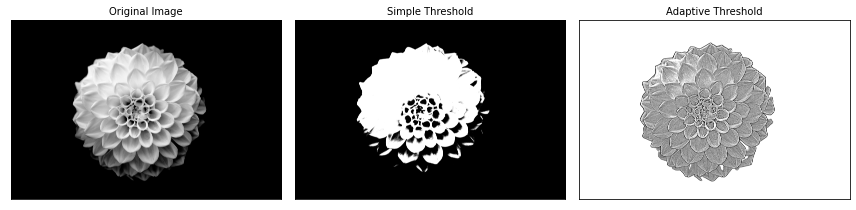

In [7]:
image = cv2.imread('Images/Input Images/Chapter 6/flower.jpg', 0)

#Apply simple thresholding
_, thresh_simple = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY )

# Apply adaptive thresholding with method=cv2.ADAPTIVE_THRESH_MEAN_C
thresh_adaptive = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 2)

# Create Subplot for Original Image and threshold images
plt.figure(figsize=(12, 4))

#Display the original image
plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Original Image', fontsize=10), plt.xticks([]), plt.yticks([])

#Display the simple thresholded image
plt.subplot(132)
plt.imshow(thresh_simple, cmap='gray')
plt.title('Simple Threshold', fontsize=10), plt.xticks([]), plt.yticks([])

#Display the adaptive threshold image
plt.subplot(133)
plt.imshow(thresh_adaptive, cmap='gray')
plt.title('Adaptive Threshold', fontsize=10), plt.xticks([]), plt.yticks([])

plt.tight_layout()

plt.show()



### Otsu's Thresholding
##### Otsu's thresholding is used to automatically calculate the threshold value for image segmentation and eliminates the need to manually search for an effective threshold value. Otsu's thresholding calculated the best possible threshold value for the image by using the histogram of the grayscale image. Otsu's thresholding works best on images where there are two clearly defined peaks in the histogram of the image and finds the best possible threshold value to seperate these peaks. The methods works by maximizing the inter-class variance between the foreground and background regions of the image. Otsu's method iterates ove rall the possible threshold values and chooses the value with the maximum variance in the image. Once the threshold value is calculated, binary thersholding can be applied to the image using this threshold value.

##### The thresh parameters in cv2.threshold() function has to be kept 0 for Otsu's thresholding to work. If the thresh value is specified it will take precedence over the Otsu's calculated thresholding value and the calculated value using Otsu's method will be ignored. We can use the retval parameter to check the threshold value used to Otsu's method for the operations.



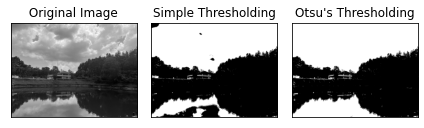

In [8]:
image = cv2.imread('Images/Input Images/Chapter 6/image.jpg', 0)
# Apply simple thresholding with a threshold value of 127
_, threshold_image_simple = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY )

#Apply Otsu's thresholding
retval, thresholded_image_otsu = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

#Display the original, simple thresholding, and Otsu's thresholding results.
plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title(' Original Image '), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(threshold_image_simple, cmap='gray')
plt.title('Simple Thresholding'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(thresholded_image_otsu, cmap='gray')
plt.title("Otsu's Thresholding"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

### Edge and Contour-based Segmentation
##### Edge based segmentation is used to extract boundaries or edges from an image, they work by identifying areas in the image with significant contrast by looking for large variations in color or texture intensities. These changes represent transitions between different objects or regions within the image.
##### Edge-based techniques work by first applying an edge detection algorithm to map out the boundaries in an image. Edge detection algorithms, such as the Canny edge detector or Sobel operator, are applied to highlight these transitions and generate a binary edge map. Once an edge is detected a binary map is created the edge pixels are assigned the value 1, representing the presence of an edge, while the non-edge pixels are assigned 0. The binary edge map serves as a mask that outlines the boudaries of objects or regions in the image.
##### Contour based segmentation is a technique used to identify and extract boundaries or contours of objects or regions in an image. We start contour-based segmentation with edge detection, where edges are detected using algorithms like Canny or Sobel. These edge pixels are then connected to form continuous curves or contours. Once the contours are detected , we can use them to further processing. Common Operations in contour based segmentation include filtering contours based on area, perimeter, or aspect ratio, approximating contours to simplify shape, and analyzing contour heirarchy.

## Advanced Segmentation Techniques
### WaterShed Algorithm
##### The watershed algorithm is a powerful image segmentation technique inspired by the water flowing through a terrain. The watershed algorithm is designed to mimic the filing of basins in  a terrain with water, with each basin representing a different region or object. The algorithm uses gradient or intensity information to detect boundaries and regions in the image. The Watershed algorithm particularly useful when extracting objects that are very close to touching each other. It is a widely applied technique with diverse applications in fields such as medical image analysis or object recognition. 
#### Gradient:
##### We start by checking the changes in brightness or colors n the image to identify the boundaries or edges between the edges. We use gradient operators such as sobel or Scharr kernels to detect the edges and highlight the transition between regions with distinct intensities. 
#### Object Markers:
##### Based on the Gradient information received, we mark the points on the image that might be potential objects. This can be done manually, or techniques like thresholding or region growing can be used for this.
#### Labels:
##### These markers are then assigned a different label to represent each object seperately.
#### Watershed Algorithm:
##### Now that we have identified the potential objects, we can use the watershed concept on the image. As discussed above we can imagine these markers as basins and start pouring water on them and filling up the areas from these object markers. The water starts from these markers and goes upto the boundaries of the objects.
#### Watershed Lines:
##### When the water keeps on flowing, eventually they will meet at the boundaries of two potential objects. These boundaries can be thought of as lines representing segmented boundaries of different objects.
#### Post Processing:
##### We have the initial boundaries or segmentation from the watershed algorithm. However, the results might not be as we expect them to be. We can use some post processing steps to merge small regions together or remove noise from the image. 



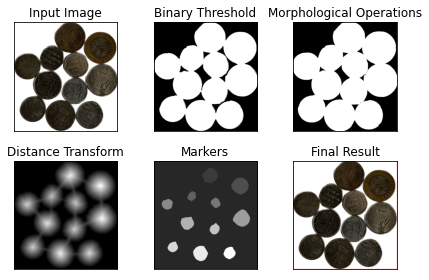

In [11]:
import numpy as np

# Load input image
image = cv2.imread('Images/Input Images/Chapter 6/coin.jpg')
original = image.copy()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY )
#Apply thresholding to create a binary image
ret, binary = cv2.threshold(gray, 245, 255, cv2.THRESH_BINARY_INV)

#Perform morphological operations to remove noise and enhance regions
kernel = np.ones((3, 3), np.uint8 )
opening =cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=1)

sure_bg = cv2.dilate(opening, kernel, iterations=5)

# Perform distance transform to identify markers
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.5*dist_transform.max(), 255, 0)
#Identify unknown regions
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Create Markers for the watershed algorithm
ret, markers = cv2.connectedComponents(sure_fg)
markers += 1
markers[unknown == 25] = 0

#Apply watershed algorithm
cv2.watershed(image, markers)
image[markers == -1] = [0, 0, 255]

#Convert images to RGB for display
gray_rgb = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB )
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB )
original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

# Display the intermediate steps and final result
titles = ['Input Image', 'Binary Threshold', 'Morphological Operations', 'Distance Transform', 'Markers', 'Final Result']
images = [original_rgb, binary, sure_bg, dist_transform, markers, image_rgb ]

for i in range(len(titles)):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
    
plt.tight_layout()
plt.show()

### GrabCut Algorithm
#### Foreground Intialization:
###### This algorithm starts with initializing a bounding box or a masked region for the object in the image. The pixels outside this area are the background pixels and the pixels inside the area are unknown since the bounding box or masked region is just a rough estimate of the object.

#### Gaussian Mixture Model(GMM):
###### A Gaussian Mixture model is used to estimate the color distribution of foreground and background regions in the image. The GMM model learns from the color distribution of the background pixels and classifies the unknown pixels as either foreground or background base on their color distribution.

#### Graph Construction:
###### Using the GMM model, a graph is constructed where nodes represent pixels and edges represent connections between pixels. The edges are assigned weights based on GMM parameters. These weights reflect the similarity or dissimilarity between the pixel intensities, helping to capture the relationships between adjacent pixels in the image.

#### GraphCut optimization:
###### The algorithm applies the GraphCut technique to optimize the segmentation by minimizing the cost function.

#### Iterative Refinement:
###### The algorithm iteratively updates the foreground and background models by adjusting the GMM parameters using the pixels classified in each iteration. Once the algorithm coverges, the final segmentation is obtained.


In [12]:
image = cv2.imread('Images/Input Images/Chapter 6/dog.jpg')
print(image.shape , image.shape[:2])
#Create a mask with same shape as the image, initialized with zeros
mask = np.zeros(image.shape[:2], np.uint8)


(6000, 3742, 3) (6000, 3742)


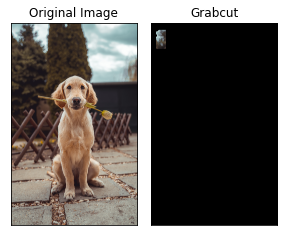

In [15]:
#Create the background and foreground model
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
#Define the region of Interest (ROI) as a rectangle
rect = (140, 232, 300, 560)

#Apply Grabcut
cv2.grabCut(image, mask, rect, bgdModel, fgdModel, iterCount=5, mode=cv2.GC_INIT_WITH_RECT )

#Assign 0 and 2 to the background and possible background regions in the mask
mask2 = np.where((mask==0) | (mask==2), 0, 1).astype('uint8')

#Apply Mask to the original image to extract the foreground
result = image * mask2[:, :, np.newaxis]

#Convert images from BGR to RGB to display images using matplotlib
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB )
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB )

#Display the original image and the simple thresholded image side by side
plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(result, cmap='gray')
plt.title('Grabcut'), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

